# Etude de la composition de requêtes 

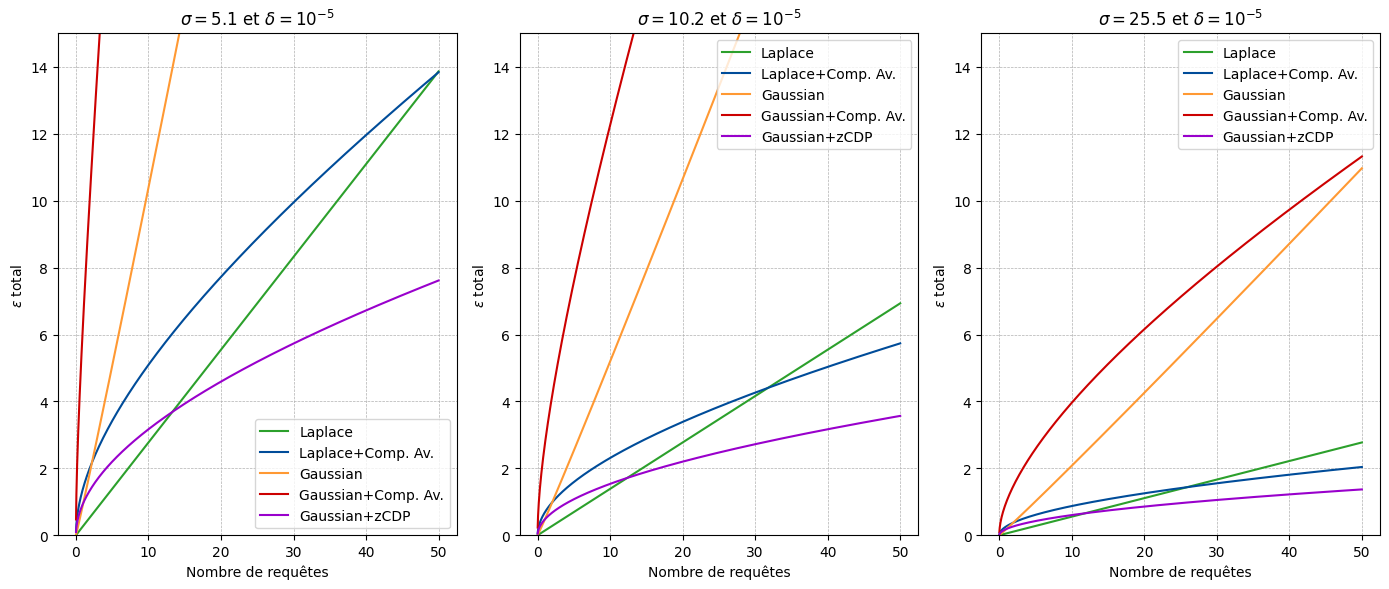

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, laplace

# Paramètres
xs = np.linspace(0.01, 50, 1000)
sigmas = [5.1, 10.2, 25.5]
delta_tot = 1e-5
delta_gauss = delta_tot / xs 
delta_gauss_av = delta_tot / (xs + 1)

colors = {
    "laplace": "#2ca02c",       # vert
    "laplace_av": "#004c99",   # bleu foncé
    "gauss": "#ff9933",         # orange
    "gauss_av": "#cc0000",     # rouge
    "gauss_zcdp": "#9900cc",    # violet
}

# Création des graphiques côte à côte
fig, axs = plt.subplots(1, 3, figsize=(14, 6))

for k in range(len(sigmas)):

    eps_lap = np.sqrt(2) / sigmas[k]
    # Laplace
    eps_tot_lap = xs * eps_lap
    # Laplace Composition Avancée
    eps_tot_lap_av = eps_lap * np.sqrt(2 * xs * np.log(1 / delta_tot)) + xs * eps_lap * (np.exp(eps_lap) - 1)


    eps_gauss = np.sqrt(2 * np.log(1.25 / delta_gauss)) / sigmas[k]
    eps_gauss_av = np.sqrt(2 * np.log(1.25 / delta_gauss_av)) / sigmas[k]
    # Gaussien
    eps_tot_gauss = xs * eps_gauss
    # Gaussien Composition Avancée
    eps_tot_gauss_av = eps_gauss_av * np.sqrt(2 * xs * np.log(1 / delta_gauss_av)) + xs * eps_gauss_av * (np.exp(eps_gauss_av) - 1)


    rho = 1 / (2 * sigmas[k]**2)
    # Gaussien zCDP 
    eps_tot_gauss_zcdp = (xs * rho) + 2 * np.sqrt((xs * rho) * np.log(1 / delta_tot))

    axs[k].plot(xs, eps_tot_lap, label="Laplace", color=colors["laplace"])
    axs[k].plot(xs, eps_tot_lap_av, label="Laplace+Comp. Av.", color=colors["laplace_av"])
    axs[k].plot(xs, eps_tot_gauss, label="Gaussian", color=colors["gauss"])
    axs[k].plot(xs, eps_tot_gauss_av, label="Gaussian+Comp. Av.", color=colors["gauss_av"])
    axs[k].plot(xs, eps_tot_gauss_zcdp, label="Gaussian+zCDP", color=colors["gauss_zcdp"])
    axs[k].set_xlabel('Nombre de requêtes')
    axs[k].set_ylabel(r'$\varepsilon$ total')
    axs[k].set_ylim(0, 15.0)
    axs[k].set_title(rf'$\sigma={sigmas[k]}$ et $\delta=10^{{{int(np.log10(delta_tot))}}}$')
    axs[k].legend()
    axs[k].grid(True, linestyle='--', linewidth=0.5)


# Affichage
plt.tight_layout()
plt.show()

## Tableau de valeurs pour différentes valeurs du nombre de requêtes

In [4]:
import numpy as np
import pandas as pd

# Paramètres
xs = np.array([5, 15, 30])
sigmas = [5.1, 10.2, 25.5]
delta_tot = 1e-5
delta_gauss = delta_tot / xs 
delta_gauss_av = delta_tot / (xs + 1)

results = []

for k in range(len(sigmas)):

    eps_lap = [np.sqrt(2) / sigmas[k]] * len(xs)
    # Laplace
    eps_tot_lap = xs * eps_lap
    # Laplace Composition Avancée
    terme_lin_lap_av = xs * eps_lap * (np.exp(eps_lap) - 1)
    terme_sqrt_lap_av = eps_lap * np.sqrt(2 * xs * np.log(1 / delta_tot))
    eps_tot_lap_av = terme_lin_lap_av + terme_sqrt_lap_av


    eps_gauss = np.sqrt(2 * np.log(1.25 / delta_gauss)) / sigmas[k]
    eps_gauss_av = np.sqrt(2 * np.log(1.25 / delta_gauss_av)) / sigmas[k]
    # Gaussien
    eps_tot_gauss = xs * eps_gauss
    # Gaussien Composition Avancée
    terme_lin_gauss_av = xs * eps_gauss_av * (np.exp(eps_gauss_av) - 1)
    terme_sqrt_gauss_av = eps_gauss_av * np.sqrt(2 * xs * np.log(1 / delta_gauss_av))
    eps_tot_gauss_av = terme_lin_gauss_av + terme_sqrt_gauss_av


    rho = [1 / (2 * sigmas[k]**2)] * len(xs)
    # Gaussien zCDP 
    terme_lin_gauss_zcdp = xs * rho
    terme_sqrt_gauss_zcdp = 2 * np.sqrt((xs * rho) * np.log(1 / delta_tot))
    eps_tot_gauss_zcdp = terme_lin_gauss_zcdp + terme_sqrt_gauss_zcdp

    for i in range(len(xs)):
        results.append({
            'sigma': sigmas[k],
            'k': xs[i],
            'eps_lap': eps_lap[i],
            'eps_tot_lap': eps_tot_lap[i],
            'terme_lin_lap_av': terme_lin_lap_av[i],
            'terme_sqrt_lap_av': terme_sqrt_lap_av[i],
            'eps_tot_lap_av': eps_tot_lap_av[i],
            'eps_gauss': eps_gauss[i],
            'eps_tot_gauss': eps_tot_gauss[i],
            'eps_gauss_av': eps_gauss_av[i],
            'terme_lin_gauss_av': terme_lin_gauss_av[i],
            'terme_sqrt_gauss_av': terme_sqrt_gauss_av[i],
            'eps_tot_gauss_av': eps_tot_gauss_av[i],
            'rho': rho[i],
            'terme_lin_gauss_zcdp': terme_lin_gauss_zcdp[i],
            'terme_sqrt_gauss_zcdp': terme_sqrt_gauss_zcdp[i],
            'eps_tot_gauss_zcdp': eps_tot_gauss_zcdp[i]
        })

df = pd.DataFrame(results)

df.round(3)

sigma   k  eps_lap  eps_tot_lap  terme_lin_lap_av  terme_sqrt_lap_av  \
0    5.1   5    0.277        1.386             0.443              2.975   
1    5.1  15    0.277        4.159             1.329              5.153   
2    5.1  30    0.277        8.319             2.658              7.288   
3   10.2   5    0.139        0.693             0.103              1.488   
4   10.2  15    0.139        2.080             0.309              2.577   
5   10.2  30    0.139        4.159             0.619              3.644   
6   25.5   5    0.055        0.277             0.016              0.595   
7   25.5  15    0.055        0.832             0.047              1.031   
8   25.5  30    0.055        1.664             0.095              1.458   

   eps_tot_lap_av  eps_gauss  eps_tot_gauss  eps_gauss_av  terme_lin_gauss_av  \
0           3.418      1.013          5.065         1.020               9.041   
1           6.483      1.054         15.808         1.056              29.715   
2           9.946      1.079         32.366         1.080              63.013   
3           1.591      0.507          2.533         0.510               1.696   
4           2.886      0.527          7.904         0.528               5.511   
5           4.263      0.539         16.183         0.540              11.600   
6           0.611      0.203          1.013         0.204               0.231   
7           1.078      0.211          3.162         0.211               0.745   
8           1.552      0.216          6.473         0.216               1.562   

   terme_sqrt_gauss_av  eps_tot_gauss_av    rho  terme_lin_gauss_zcdp  \
0               11.764            20.805  0.019                 0.096   
1               21.866            51.580  0.019                 0.288   
2               32.344            95.357  0.019                 0.577   
3                5.882             7.578  0.005                 0.024   
4               10.933            16.444  0.005                 0.072   
5               16.172            27.772  0.005                 0.144   
6                2.353             2.584  0.001                 0.004   
7                4.373             5.119  0.001                 0.012   
8                6.469             8.031  0.001                 0.023   

   terme_sqrt_gauss_zcdp  eps_tot_gauss_zcdp  
0                  2.104               2.200  
1                  3.644               3.932  
2                  5.153               5.730  
3                  1.052               1.076  
4                  1.822               1.894  
5                  2.577               2.721  
6                  0.421               0.425  
7                  0.729               0.740  
8                  1.031               1.054

## Contribution des termes linéaires et racines en k

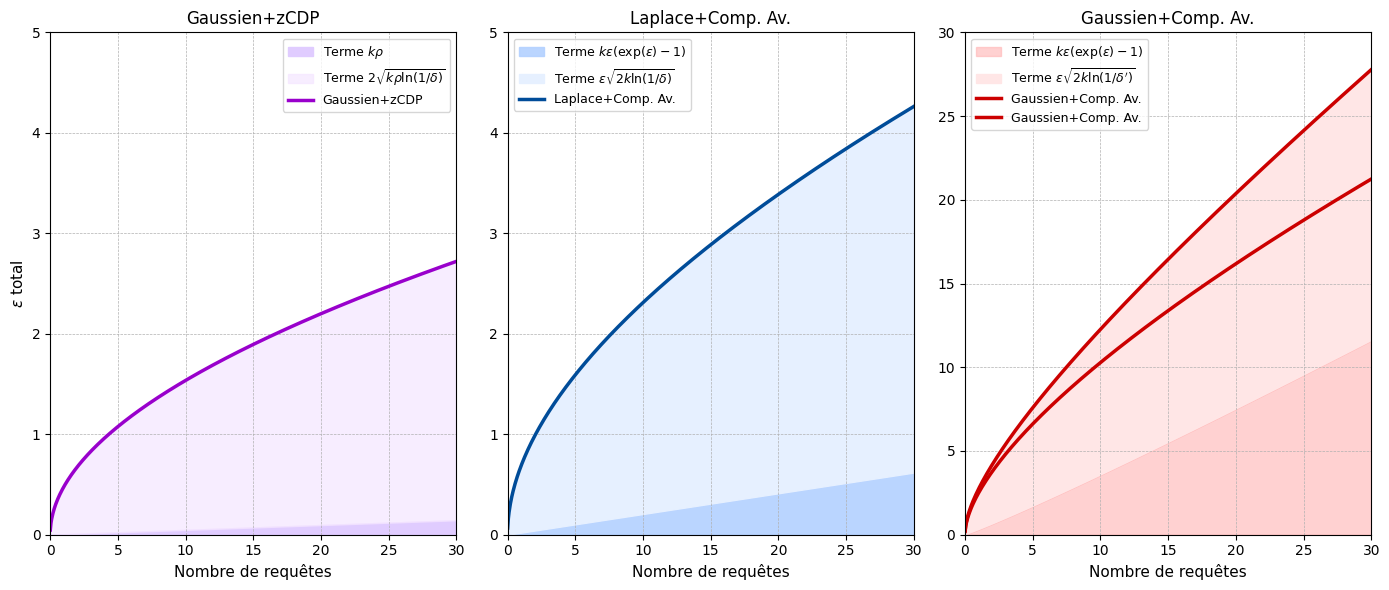

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
xs = np.linspace(0.01, 50, 1000)
sigma = 10.2
delta_tot = 1e-5
delta_gauss_av = delta_tot / (xs + 1)

colors = {
    "laplace": "#2ca02c",       # vert
    "laplace_av": "#004c99",   # bleu foncé
    "gauss": "#ff9933",         # orange
    "gauss_av": "#cc0000",     # rouge
    "gauss_zcdp": "#9900cc",    # violet
}

# Gaussien zCDP 
rho = 1 / (2 * sigma**2)
terme_lin_gauss_zcdp = xs * rho
terme_sqrt_gauss_zcdp = 2 * np.sqrt((xs * rho) * np.log(1 / delta_tot))
eps_tot_gauss_zcdp = terme_lin_gauss_zcdp + terme_sqrt_gauss_zcdp

# Laplace Composition Avancée
eps_lap = np.sqrt(2) / sigma
terme_lin_lap_av = xs * eps_lap * (np.exp(eps_lap) - 1)
terme_sqrt_lap_av = eps_lap * np.sqrt(2 * xs * np.log(1 / delta_tot))
eps_tot_lap_av = terme_lin_lap_av + terme_sqrt_lap_av

# Gaussien Composition Avancée
eps_gauss_av = np.sqrt(2 * np.log(1.25 / delta_gauss_av)) / sigma
terme_lin_gauss_av = xs * eps_gauss_av * (np.exp(eps_gauss_av) - 1)
terme_sqrt_gauss_av = eps_gauss_av * np.sqrt(2 * xs * np.log(1 / delta_gauss_av))
eps_tot_gauss_av = terme_lin_gauss_av + terme_sqrt_gauss_av

# === Création des figures ===
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))

# === Figure 1 : Gaussian+zCDP ===
ax1.fill_between(xs, 0, terme_lin_gauss_zcdp, label=r"Terme $k\rho$", color='#e0ccff', alpha=1)
ax1.fill_between(xs, terme_lin_gauss_zcdp, eps_tot_gauss_zcdp, label=r"Terme $2\sqrt{k\rho\ln(1/\delta)}$", color='#f5e6ff', alpha=0.7)
ax1.plot(xs, eps_tot_gauss_zcdp, label=r"Gaussien+zCDP", color=colors["gauss_zcdp"], linewidth=2.5)

ax1.set_title(rf"Gaussien+zCDP", fontsize=12)
ax1.set_xlabel("Nombre de requêtes", fontsize=11)
ax1.set_ylabel(r"$\epsilon$ total", fontsize=11)
ax1.set_xlim(0, 30)
ax1.set_ylim(0, 5)
ax1.grid(True, linestyle='--', linewidth=0.5)
ax1.legend(fontsize=9)

# === Figure 2 : Laplace+Comp. Av.===
ax2.fill_between(xs, 0, terme_lin_lap_av, label=r"Terme $k\epsilon(\exp(\epsilon)-1)$", color='#b3d1ff', alpha=0.9)
ax2.fill_between(xs, terme_lin_lap_av, eps_tot_lap_av, label=r"Terme $\epsilon\sqrt{2k\ln(1/\delta)}$", color='#e6f0ff', alpha=1)
ax2.plot(xs, eps_tot_lap_av, label=r"Laplace+Comp. Av.", color=colors["laplace_av"], linewidth=2.5)

ax2.set_title(rf"Laplace+Comp. Av.", fontsize=12)
ax2.set_xlabel("Nombre de requêtes", fontsize=11)
ax2.set_ylabel(r"", fontsize=11)
ax2.set_xlim(0, 30)
ax2.set_ylim(0, 5)
ax2.grid(True, linestyle='--', linewidth=0.5)
ax2.legend(fontsize=9)

# === Figure 3 : Gaussien+Comp. Av.===
ax3.fill_between(xs, 0, terme_lin_gauss_av, label=r"Terme $k\epsilon(\exp(\epsilon)-1)$", color='#ffb3b3', alpha=0.6)
ax3.fill_between(xs, terme_lin_gauss_av, eps_tot_gauss_av, label=r"Terme $\epsilon\sqrt{2k\ln(1/\delta')}$", color='#ffe6e6', alpha=1)
ax3.plot(xs, eps_tot_gauss_av, label=r"Gaussien+Comp. Av.", color=colors["gauss_av"], linewidth=2.5)
ax3.plot(xs, xs * eps_gauss_av **2 /2 + eps_gauss_av * np.sqrt(2 * xs * np.log(np.sqrt(np.pi * xs/2)* eps_gauss_av/ delta_gauss_av)), label=r"Gaussien+Comp. Av.", color=colors["gauss_av"], linewidth=2.5)

ax3.set_title(rf"Gaussien+Comp. Av.", fontsize=12)
ax3.set_xlabel("Nombre de requêtes", fontsize=11)
ax3.set_ylabel(r"", fontsize=11)
ax3.set_xlim(0, 30)
ax3.set_ylim(0, 30)
ax3.grid(True, linestyle='--', linewidth=0.5)
ax3.legend(fontsize=9)

plt.tight_layout()
plt.show()

## Etude de la valeur de delta optimal dans la composition avancée de bruit gaussien

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Paramètres
xs = np.linspace(0.01, 100, 1000)
sigma = 10.2
delta_tot = 1e-5
delta_gauss_av = delta_tot / (xs + 1)

# Préparation de la figure
fig, ax = plt.subplots(figsize=(12, 6))

# Animation
def animate(i):
    ax.clear()
    alpha = (i+1) / 50  # variation de 0.02 à 0.98
    delta_gauss_av = alpha * delta_tot / xs
    delta_prime = delta_tot - xs * delta_gauss_av

    eps_gauss_av = np.sqrt(2 * np.log(1.25 / delta_gauss_av)) / sigma
    terme_lin_gauss_av = xs * eps_gauss_av * (np.exp(eps_gauss_av) - 1)
    terme_sqrt_gauss_av = eps_gauss_av * np.sqrt(2 * xs * np.log(1 / delta_prime))
    eps_tot_gauss_av = terme_lin_gauss_av + terme_sqrt_gauss_av

    ax.fill_between(xs, 0, terme_lin_gauss_av, label=r"Terme $k\epsilon(\exp(\epsilon)-1)$", color='#ffb3b3', alpha=0.6)
    ax.fill_between(xs, terme_lin_gauss_av, eps_tot_gauss_av, label=r"Terme $\epsilon\sqrt{2k\ln(1/\delta')}$", color='#ffe6e6', alpha=1)
    ax.plot(xs, eps_tot_gauss_av, label=r"Gaussien+Comp. Av.", color=colors["gauss_av"], linewidth=2.5)

    ax.set_ylim(0, 80)
    ax.set_xlabel("Nombre de requêtes", fontsize=12)
    ax.set_ylabel(r"$\epsilon$ total", fontsize=12)
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.set_title(r"Gaussien+Comp. Av. – Allocation $\delta = {:.2f} \cdot \delta_{{\text{{total}}}} / k$".format(alpha), fontsize=14)
    ax.legend(fontsize=10)
    return ax.collections + ax.lines

# Création et affichage de l'animation dans le notebook
anim = animation.FuncAnimation(fig, animate, frames=49,  blit=False, interval=100)
plt.close(fig)
HTML(anim.to_jshtml())

## Contribution relative du terme linéaire

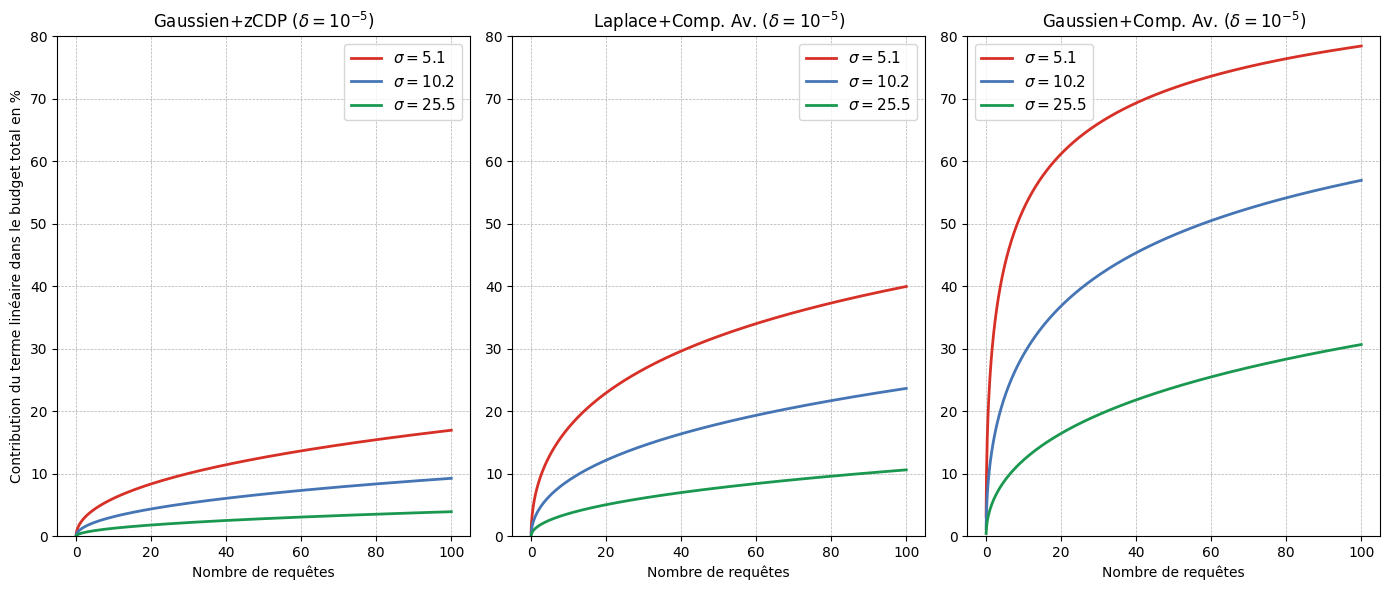

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# === Couleurs par sigma ===
colors = {
    5.1: "#d73027",     # rouge
    10.2: "#4575b4",    # bleu
    25.5: "#1a9850",    # vert
}

# Paramètres
xs = np.linspace(0.01, 100, 1000)
sigmas = [5.1, 10.2, 25.5]
delta_tot = 1e-5
delta_gauss_av = delta_tot / (xs + 1)

# === Fonctions de calcul ===

def ratio_gauss_zcdp(sigma):
    rho = 1 / (2 * sigma**2)
    terme_lin_gauss_zcdp = xs * rho
    terme_sqrt_gauss_zcdp = 2 * np.sqrt((xs * rho) * np.log(1 / delta_tot))
    eps_tot_gauss_zcdp = terme_lin_gauss_zcdp + terme_sqrt_gauss_zcdp
    return 100*terme_lin_gauss_zcdp / eps_tot_gauss_zcdp

def ratio_laplace_av(sigma):
    eps_lap = np.sqrt(2) / sigma
    terme_lin_lap_av = xs * eps_lap * (np.exp(eps_lap) - 1)
    terme_sqrt_lap_av = eps_lap * np.sqrt(2 * xs * np.log(1 / delta_tot))
    eps_tot_lap_av = terme_lin_lap_av + terme_sqrt_lap_av
    return 100*terme_lin_lap_av / eps_tot_lap_av

def ratio_gauss_av(sigma):
    eps_gauss_av = np.sqrt(2 * np.log(1.25 / delta_gauss_av)) / sigma
    terme_lin_gauss_av = xs * eps_gauss_av * (np.exp(eps_gauss_av) - 1)
    terme_sqrt_gauss_av = eps_gauss_av * np.sqrt(2 * xs * np.log(1 / delta_gauss_av))
    eps_tot_gauss_av = terme_lin_gauss_av + terme_sqrt_gauss_av
    return 100*terme_lin_gauss_av / eps_tot_gauss_av

# === Plot ===

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))

# 1. zCDP
for sigma in sigmas:
    ax1.plot(xs, ratio_gauss_zcdp(sigma), color=colors[sigma], label=rf"$\sigma={sigma}$", linewidth=2)
ax1.set_title(rf"Gaussien+zCDP ($\delta=10^{{{int(np.log10(delta_tot))}}}$)")
ax1.set_xlabel("Nombre de requêtes")
ax1.set_ylabel("Contribution du terme linéaire dans le budget total en %")
ax1.set_ylim(0, 80)
ax1.grid(True, linestyle="--", linewidth=0.5)
ax1.legend(fontsize=11)

# 2. Laplace Adv
for sigma in sigmas:
    ax2.plot(xs, ratio_laplace_av(sigma), color=colors[sigma], label=rf"$\sigma={sigma}$", linewidth=2)
ax2.set_title(rf"Laplace+Comp. Av. ($\delta=10^{{{int(np.log10(delta_tot))}}}$)")
ax2.set_xlabel("Nombre de requêtes")
ax2.set_ylabel("")
ax2.set_ylim(0, 80)
ax2.grid(True, linestyle="--", linewidth=0.5)
ax2.legend(fontsize=11)

# 3. Gaussian Adv
for sigma in sigmas:
    ax3.plot(xs, ratio_gauss_av(sigma), color=colors[sigma], label=rf"$\sigma={sigma}$", linewidth=2)
ax3.set_title(rf"Gaussien+Comp. Av. ($\delta=10^{{{int(np.log10(delta_tot))}}}$)")
ax3.set_xlabel("Nombre de requêtes")
ax3.set_ylabel("")
ax3.set_ylim(0, 80)
ax3.grid(True, linestyle="--", linewidth=0.5)
ax3.legend(fontsize=11)

plt.tight_layout()
plt.show()